In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
import json
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outliers :

<AxesSubplot: >

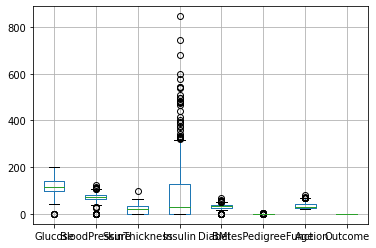

In [5]:
df.boxplot()

<AxesSubplot: xlabel='Insulin'>

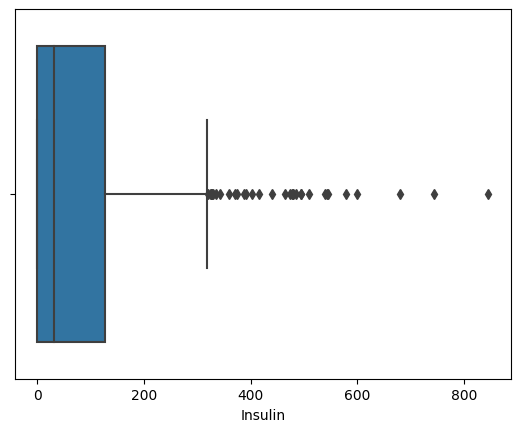

In [6]:
sns.boxplot(x= df["Insulin"])

In [7]:
q1= df["Insulin"].quantile(0.25)
q3= df["Insulin"].quantile(0.75)
iqr= q3-q1
upper_tail= q3+2*iqr
print("upper tail :",upper_tail)



upper tail : 381.75


In [8]:
df.loc[df["Insulin"]> upper_tail].shape

(22, 8)

In [9]:
df["Insulin"]= np.where(df["Insulin"]> upper_tail,upper_tail,df["Insulin"])
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0.0,33.6,0.627,50,1
1,85,66,29,0.0,26.6,0.351,31,0
2,183,64,0,0.0,23.3,0.672,52,1
3,150,66,23,94.0,28.1,0.167,21,0
4,150,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63,0
764,122,70,27,0.0,36.8,0.340,27,0
765,121,72,23,112.0,26.2,0.245,30,0
766,126,60,0,0.0,30.1,0.349,47,1


## Model_training

### train_test_split

In [10]:
x = df.drop("Outcome",axis=1)
y= df["Outcome"]
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0.0,33.6,0.627,50
1,85,66,29,0.0,26.6,0.351,31
2,183,64,0,0.0,23.3,0.672,52
3,150,66,23,94.0,28.1,0.167,21
4,150,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63
764,122,70,27,0.0,36.8,0.340,27
765,121,72,23,112.0,26.2,0.245,30
766,126,60,0,0.0,30.1,0.349,47


In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=30,stratify=y)

In [12]:
knn_clf= KNeighborsClassifier(n_neighbors=5,p=2)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Evaluation

In [13]:
# trainig data:
y_pred_train =knn_clf.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[326  49]
 [ 73 128]]
******************************
accuracy :
 0.7881944444444444
******************************
classification report :
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       375
           1       0.72      0.64      0.68       201

    accuracy                           0.79       576
   macro avg       0.77      0.75      0.76       576
weighted avg       0.78      0.79      0.78       576



In [14]:
# testing data:
y_pred =knn_clf.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[101  24]
 [ 22  45]]
******************************
accuracy :
 0.7604166666666666
******************************
classification report :
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       125
           1       0.65      0.67      0.66        67

    accuracy                           0.76       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



## Hyperparameter Tuning

In [15]:
knn_model= KNeighborsClassifier()
hyperparameters={ "n_neighbors":np.arange(3,20),
                 "p":[1,2]    
                }
gscv_knn_model= GridSearchCV(knn_model, hyperparameters,cv=5)
gscv_knn_model.fit(x_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=19, p=1)

In [16]:
knn_model=gscv_knn_model.best_estimator_
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19, p=1)

In [17]:
# trainig data with hyperparameter tuning:
y_pred_train =knn_model.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[334  41]
 [ 80 121]]
******************************
accuracy :
 0.7899305555555556
******************************
classification report :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       375
           1       0.75      0.60      0.67       201

    accuracy                           0.79       576
   macro avg       0.78      0.75      0.76       576
weighted avg       0.79      0.79      0.78       576



In [18]:
# testing data with hyperparameter tuning:
y_pred =knn_model.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[106  19]
 [ 26  41]]
******************************
accuracy :
 0.765625
******************************
classification report :
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       125
           1       0.68      0.61      0.65        67

    accuracy                           0.77       192
   macro avg       0.74      0.73      0.74       192
weighted avg       0.76      0.77      0.76       192



In [19]:
train_acc_list=[]
test_acc_list=[]
for k in np.arange(3,20):
    knn_cls_model=KNeighborsClassifier(n_neighbors=k,p=1)
    knn_cls_model.fit(x_train,y_train)
    train_accuracy=knn_cls_model.score(x_train,y_train)
    train_acc_list.append(train_accuracy)
    
    test_accuracy=knn_cls_model.score(x_test,y_test)
    test_acc_list.append(test_accuracy)
    

Text(0, 0.5, 'accuracy')

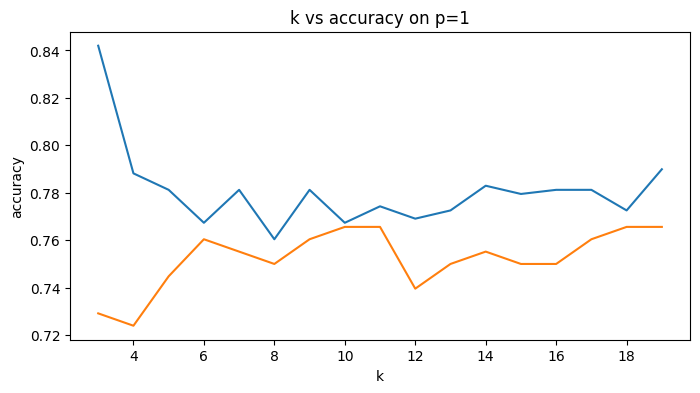

In [20]:
plt.figure(figsize=(8,4))
k= np.arange(3,20)
plt.plot(k,train_acc_list)
plt.plot(k,test_acc_list)
plt.title('k vs accuracy on p=1')
plt.xlabel('k')
plt.ylabel('accuracy')


In [21]:
train_acc_list=[]
test_acc_list=[]
for k in np.arange(3,20):
    knn_cls_model=KNeighborsClassifier(n_neighbors=k,p=2)
    knn_cls_model.fit(x_train,y_train)
    train_accuracy=knn_cls_model.score(x_train,y_train)
    train_acc_list.append(train_accuracy)
    
    test_accuracy=knn_cls_model.score(x_test,y_test)
    test_acc_list.append(test_accuracy)

Text(0, 0.5, 'accuracy')

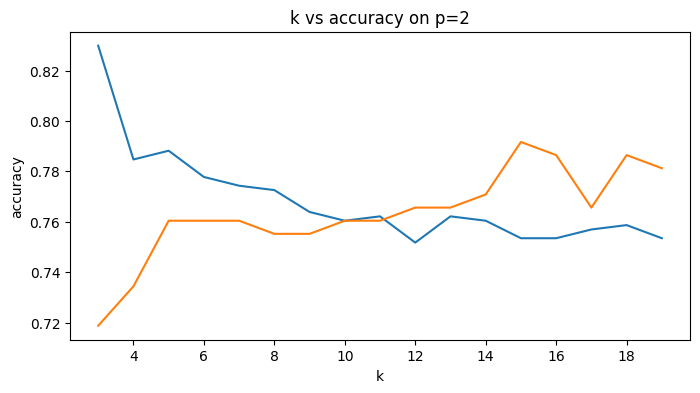

In [22]:
plt.figure(figsize=(8,4))
k= np.arange(3,20)
plt.plot(k,train_acc_list)
plt.plot(k,test_acc_list)
plt.title('k vs accuracy on p=2')
plt.xlabel('k')
plt.ylabel('accuracy')

In [23]:
knn_clf_10= KNeighborsClassifier(n_neighbors=10,p=1)
knn_clf_10.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [24]:
# trainig data:
y_pred_train =knn_clf_10.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[342  33]
 [101 100]]
******************************
accuracy :
 0.7673611111111112
******************************
classification report :
               precision    recall  f1-score   support

           0       0.77      0.91      0.84       375
           1       0.75      0.50      0.60       201

    accuracy                           0.77       576
   macro avg       0.76      0.70      0.72       576
weighted avg       0.76      0.77      0.75       576



In [25]:
# testing data:
y_pred =knn_clf_10.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[110  15]
 [ 30  37]]
******************************
accuracy :
 0.765625
******************************
classification report :
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       125
           1       0.71      0.55      0.62        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



## Normalization

In [26]:
normal_scaler= MinMaxScaler()
array1= normal_scaler.fit_transform(x)
normal_x= pd.DataFrame(array1, columns=x.columns)
normal_x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.246234,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.440079,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.471513,0.490313,0.039710,0.700000
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.608040,0.590164,0.232323,0.293386,0.390462,0.071307,0.150000
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [27]:
x_train,x_test,y_train,y_test= train_test_split(normal_x,y,test_size=0.25,random_state=30,stratify=y)

In [28]:
knn_clf_normal= KNeighborsClassifier(n_neighbors=5,p=2)
knn_clf_normal.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
# trainig data with normalization:
y_pred_train =knn_clf_normal.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[331  44]
 [ 68 133]]
******************************
accuracy :
 0.8055555555555556
******************************
classification report :
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       375
           1       0.75      0.66      0.70       201

    accuracy                           0.81       576
   macro avg       0.79      0.77      0.78       576
weighted avg       0.80      0.81      0.80       576



In [30]:
# testing data with normalization:
y_pred =knn_clf_normal.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[102  23]
 [ 26  41]]
******************************
accuracy :
 0.7447916666666666
******************************
classification report :
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       125
           1       0.64      0.61      0.63        67

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



### Normalization with hyperparameter tuning

In [31]:
knn_model_n= KNeighborsClassifier()
hyperparameters={ "n_neighbors":np.arange(3,20),
                 "p":[1,2]    
                }
gscv_knn_model_n= GridSearchCV(knn_model_n, hyperparameters,cv=5)
gscv_knn_model_n.fit(x_train,y_train)
gscv_knn_model_n.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [32]:
knn_model_n=gscv_knn_model_n.best_estimator_
knn_model_n.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [33]:
# trainig data with normalization and hyperparameter tuning:
y_pred_train =knn_model_n.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[335  40]
 [ 87 114]]
******************************
accuracy :
 0.7795138888888888
******************************
classification report :
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       375
           1       0.74      0.57      0.64       201

    accuracy                           0.78       576
   macro avg       0.77      0.73      0.74       576
weighted avg       0.78      0.78      0.77       576



In [34]:
# testing data with normalization and hyperparameter tuning:
y_pred =knn_model_n.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[105  20]
 [ 27  40]]
******************************
accuracy :
 0.7552083333333334
******************************
classification report :
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       125
           1       0.67      0.60      0.63        67

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



## Standardization

In [35]:
standard_scaler= StandardScaler()
array2= standard_scaler.fit_transform(x)
standard_x= pd.DataFrame(array2, columns=x.columns)
standard_x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-0.985618,0.907270,-0.761180,0.204013,0.468492,1.426022
1,-1.136319,-0.158966,0.530902,-0.761180,-0.684422,-0.365061,-0.190927
2,1.946957,-0.262298,-1.288212,-0.761180,-1.103255,0.604397,1.596227
3,0.908711,-0.158966,0.154533,0.182843,-0.494043,-0.920763,-1.041953
4,0.908711,-1.502276,0.907270,0.926010,1.409746,5.484909,-0.020722
...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,1.046523,0.115169,-0.908682,2.532356
764,0.027775,0.047697,0.405445,-0.761180,0.610154,-0.398282,-0.531337
765,-0.003687,0.151028,0.154533,0.363613,-0.735190,-0.685193,-0.276029
766,0.153623,-0.468961,-1.288212,-0.761180,-0.240205,-0.371101,1.170715


In [36]:
x_train,x_test,y_train,y_test= train_test_split(standard_x,y,test_size=0.25,random_state=30,stratify=y)

In [37]:
knn_clf_standard= KNeighborsClassifier(n_neighbors=5,p=2)
knn_clf_standard.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
# trainig data with standardization:
y_pred_train =knn_clf_standard.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[331  44]
 [ 71 130]]
******************************
accuracy :
 0.8003472222222222
******************************
classification report :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       375
           1       0.75      0.65      0.69       201

    accuracy                           0.80       576
   macro avg       0.79      0.76      0.77       576
weighted avg       0.80      0.80      0.80       576



In [39]:
# testing data with standardization:
y_pred =knn_clf_standard.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[101  24]
 [ 24  43]]
******************************
accuracy :
 0.75
******************************
classification report :
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       125
           1       0.64      0.64      0.64        67

    accuracy                           0.75       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



### Standardization with hyperparameter tuning

In [40]:
knn_model_s= KNeighborsClassifier()
hyperparameters={ "n_neighbors":np.arange(3,20),
                 "p":[1,2]    
                }
gscv_knn_model_s= GridSearchCV(knn_model_s, hyperparameters,cv=5)
gscv_knn_model_s.fit(x_train,y_train)
gscv_knn_model_s.best_estimator_

KNeighborsClassifier(n_neighbors=16, p=1)

In [41]:
knn_model_s= gscv_knn_model_s.best_estimator_
knn_model_s.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16, p=1)

In [42]:
# trainig data with standardization and hyperparameter tuning:
y_pred_train =knn_model_s.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[348  27]
 [ 98 103]]
******************************
accuracy :
 0.7829861111111112
******************************
classification report :
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       375
           1       0.79      0.51      0.62       201

    accuracy                           0.78       576
   macro avg       0.79      0.72      0.74       576
weighted avg       0.78      0.78      0.77       576



In [43]:
# testing data with standardization and hyperparameter tuning:
y_pred =knn_model_s.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[108  17]
 [ 29  38]]
******************************
accuracy :
 0.7604166666666666
******************************
classification report :
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.69      0.57      0.62        67

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



## Under sampling

In [44]:
under_sampler= RandomUnderSampler(sampling_strategy=1)
x_sample,y_sample = under_sampler.fit_resample(standard_x,y)
y_sample.value_counts()


0    268
1    268
Name: Outcome, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_sample,y_sample,test_size=0.25, random_state=30, stratify= y_sample)


In [46]:
knn_clf_standard_u= KNeighborsClassifier(n_neighbors=5,p=2)
knn_clf_standard_u.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
# trainig data with standardization and undersampling:
y_pred_train =knn_clf_standard_u.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[169  32]
 [ 36 165]]
******************************
accuracy :
 0.8308457711442786
******************************
classification report :
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       201
           1       0.84      0.82      0.83       201

    accuracy                           0.83       402
   macro avg       0.83      0.83      0.83       402
weighted avg       0.83      0.83      0.83       402



In [48]:
# testing data with standardization and undersampling:
y_pred =knn_clf_standard_u.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[48 19]
 [25 42]]
******************************
accuracy :
 0.6716417910447762
******************************
classification report :
               precision    recall  f1-score   support

           0       0.66      0.72      0.69        67
           1       0.69      0.63      0.66        67

    accuracy                           0.67       134
   macro avg       0.67      0.67      0.67       134
weighted avg       0.67      0.67      0.67       134



## Oversampling

In [49]:
over_sampler= RandomOverSampler(sampling_strategy=1)
x_samples,y_samples= over_sampler.fit_resample(standard_x,y)
y_samples.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_samples,y_samples,test_size=0.25, random_state=30, stratify= y_samples)

In [51]:
knn_clf_standard_o= KNeighborsClassifier(n_neighbors=5,p=2)
knn_clf_standard_o.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
# trainig data with standardization and oversampling:
y_pred_train =knn_clf_standard_o.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[295  80]
 [ 50 325]]
******************************
accuracy :
 0.8266666666666667
******************************
classification report :
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       375
           1       0.80      0.87      0.83       375

    accuracy                           0.83       750
   macro avg       0.83      0.83      0.83       750
weighted avg       0.83      0.83      0.83       750



In [53]:
# testing data with standardization and oversampling:
y_pred =knn_clf_standard_o.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[85 40]
 [27 98]]
******************************
accuracy :
 0.732
******************************
classification report :
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       125
           1       0.71      0.78      0.75       125

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250



## SMOTE

In [54]:
smote_over_sampler= SMOTE(sampling_strategy=0.7,random_state=30,k_neighbors=5,n_jobs=None)
x_sampled,y_sampled= smote_over_sampler.fit_resample(standard_x,y)
y_sampled.value_counts()

0    500
1    350
Name: Outcome, dtype: int64

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.25, random_state=30, stratify= y_sampled)

In [56]:
knn_clf_standard_s= KNeighborsClassifier(n_neighbors=5,p=2)
knn_clf_standard_s.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
# trainig data with standardization and oversampling(smote):
y_pred_train =knn_clf_standard_s.predict(x_train)
conf_matrix= confusion_matrix(y_train,y_pred_train)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_train,y_pred_train)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_train,y_pred_train)
print('classification report :\n',cls_report)

confusion matrix :
 [[315  60]
 [ 62 200]]
******************************
accuracy :
 0.8084772370486656
******************************
classification report :
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       375
           1       0.77      0.76      0.77       262

    accuracy                           0.81       637
   macro avg       0.80      0.80      0.80       637
weighted avg       0.81      0.81      0.81       637



In [58]:
# testing data with standardization and oversampling(smote):
y_pred =knn_clf_standard_s.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix :\n',conf_matrix)
print("*"*30)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :\n',accuracy)
print("*"*30)
cls_report= classification_report(y_test,y_pred)
print('classification report :\n',cls_report)

confusion matrix :
 [[99 26]
 [24 64]]
******************************
accuracy :
 0.7652582159624414
******************************
classification report :
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       125
           1       0.71      0.73      0.72        88

    accuracy                           0.77       213
   macro avg       0.76      0.76      0.76       213
weighted avg       0.77      0.77      0.77       213



### save data into pickle file

In [59]:
knn_clf_standard_s

KNeighborsClassifier()

In [61]:
with open("knn_clf_diabetes.pkl","wb") as f:
    pickle.dump(knn_clf_standard,f)


In [ ]:
standard_scaler

In [62]:
with open("standard_scaler.pkl", "wb") as f:
    pickle.dump(standard_scaler,f)

### json data file

In [ ]:
json_data= {"columns":x.columns.tolist()}
len(x.columns)

In [69]:
Glucose = 60
BloodPressure= 100
SkinThickness= 17
Insulin=220
Bmi=25
DiabetesPedigreeFunction=1.1
Age=62
test_array = np.array([Glucose, BloodPressure,SkinThickness, Insulin, Bmi,
                      DiabetesPedigreeFunction,Age ], ndmin = 2)                

scaled_test_array= standard_scaler.transform(test_array)

pred_prob= knn_clf_standard_s.predict_proba(scaled_test_array)[0,1]
f"{pred_prob*100}%"       
    

C:\Users\91826\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\91826\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'60.0%'